In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt
# fake beta function
def special_beta(alpha, beta): return special.gamma(alpha)*special.gamma(beta)/special.gamma(alpha+beta)

In [23]:
import eko.dglap as dglap
import eko.interpolation as interpolation
%aimport eko.dglap
%aimport eko.interpolation

In [32]:
def plot_dist(x,y,yref):
    """compare to distributions both in linear and logarithmic x-space"""
    plt.figure(figsize=(10,7))
    plt.subplot(2,2,1)
    plt.title("f(x) vs ref(x)")
    plt.plot(x,y,"o")
    plt.plot(x,yref,"x")
    plt.subplot(2,2,3)
    plt.title("relative error")
    plt.semilogy(x,np.abs((y - yref)/yref))
    plt.subplot(2,2,2)
    plt.title("f(x) vs ref(x)")
    plt.semilogx(x,y,"o")
    plt.semilogx(x,yref,"x")
    plt.subplot(2,2,4)
    plt.title("relative error")
    plt.loglog(x,np.abs((y - yref)/yref))

In [4]:
toy_xgrid = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,.1,.3,.5,.7,.9]
def toy_xuv0(x):
    return 5.107200 * x**0.8 * (1. - x)**3

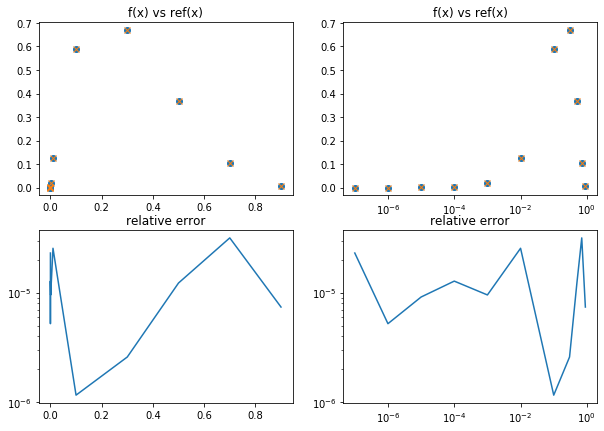

In [5]:
toy_xuv0_grid = np.array([toy_xuv0(x) for x in toy_xgrid])
toy_xuv0_grid_ref = np.array([1.2829e-5,8.0943e-5,5.1070e-4,3.2215e-3,2.0271e-2,1.2448e-1,5.9008e-1,6.6861e-1,3.6666e-1,1.0366e-1,4.6944e-3])
plot_dist(toy_xgrid,toy_xuv0_grid,toy_xuv0_grid_ref)

In [27]:
interpolation.get_xgrid_Chebyshev_at_log10(7,1e-6)

[1.189094207336904e-06,
 4.513417958554193e-06,
 4.992853033786162e-05,
 0.000999999999999999,
 0.020028628786649537,
 0.2215615768765043,
 0.8409762606106714]

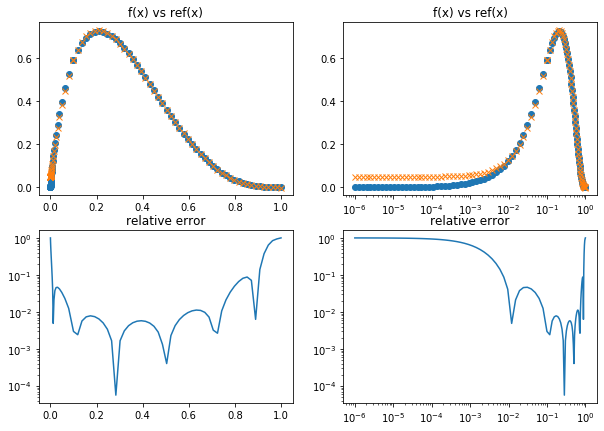

In [38]:
def plot_interpolation(f,g):
    """plot f(x) and its interpolation obtained by n grid points"""
    n = len(g)
    fs = [f(x) for x in g]
    p = lambda xx: np.sum([fs[j] * interpolation.get_Lagrange_iterpolators_x(xx,g,j) for j in range(n)])
    xs = np.append(np.logspace(-6,-1),np.linspace(.1,1.))
    ys = np.array([f(x) for x in xs])
    yps = np.array([p(x) for x in xs])
    plot_dist(xs,ys,yps)
plot_interpolation(toy_xuv0,interpolation.get_xgrid_Chebyshev_at_id(7))

In [15]:
ret = dglap.run_dglap({
    "PTO": 0,
    'alphas': 0.35,
    'Qref': np.sqrt(2),
    'Q0': np.sqrt(2),
    'NfFF': 4,

    "xgrid_size": 7,
    "targetgrid": toy_xgrid,
    "Q2grid": [1e4]
})

In [16]:
ret

{'xgrid': [0.01253604390908819,
  0.1090842587659851,
  0.2830581304412209,
  0.49999999999999994,
  0.716941869558779,
  0.890915741234015,
  0.9874639560909118],
 'operators': {'NS': array([[-3.84058963e-01,  1.87019035e-01, -5.63410664e-02,
           6.74309221e-02, -2.16419652e-02,  2.38754026e-02,
          -4.07605933e-03],
         [-4.26333537e-01,  1.59330748e-01, -5.76575511e-02,
           6.00563389e-02, -2.14320437e-02,  2.15326759e-02,
          -3.95843199e-03],
         [-3.97954510e-01,  8.38146971e-02, -4.47876768e-02,
           3.67238934e-02, -1.53791059e-02,  1.36739157e-02,
          -2.73774586e-03],
         [-2.62332319e-01, -5.90667139e-02, -1.06491337e-02,
          -9.22278203e-03, -6.34283203e-04, -2.01719297e-03,
           1.13309195e-04],
         [ 2.88225370e-02, -2.95284584e-01,  5.37221137e-02,
          -8.61087728e-02,  2.63704149e-02, -2.84183936e-02,
           5.25325376e-03],
         [ 5.03969109e-01, -5.85555627e-01,  9.83769918e-02,
      

In [17]:
toy_xuv1_xgrid = np.array([toy_xuv0(x) for x in ret["xgrid"]])
toy_xuv1_grid = np.dot(ret["operators"]["NS"],toy_xuv1_xgrid)
toy_xuv1_grid_ref = np.array([5.7722e-5,3.3373e-4,1.8724e-3,1.0057e-2,5.0392e-2,2.1955e-1,5.7267e-1,3.7925e-1,1.3476e-1,2.3123e-2,4.3443e-4])

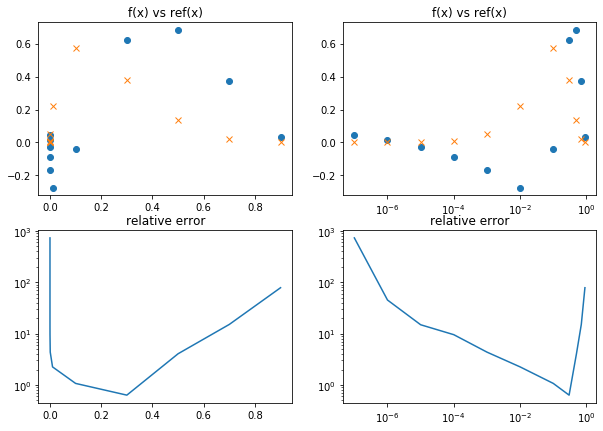

In [18]:
plot_dist(toy_xgrid,toy_xuv1_grid,toy_xuv1_grid_ref)

In [42]:
def fit_ref(ys):
    f = lambda x,g=toy_xgrid,ys=ys : np.sum([ys[j]*interpolation.get_Lagrange_iterpolators_x(x,g,j) for j in range(len(ys))])
    xs = np.append(np.logspace(-6,-1,5),np.linspace(.1,1.,5))
    ys = np.array([f(x) for x in xs])
    print(ys)
    #yps = ys
    #plot_dist(xs,ys,yps)
fit_ref(toy_xuv1_grid_ref)

[ 3.33730000e-04  1.73787883e-03  1.75648368e+00 -4.08045946e+04
  5.72670000e-01  5.72670000e-01  1.00919534e+12 -1.97701437e+13
  3.09249839e+14 -1.26866763e+16]
